## UCI Healthcare-Workforce-Mental-Health-Dataset-Exploratory and Descriptive analysis

this notebook if focused on data preparation, cleaning and preprocessing for the 
UCI Healthcare-Workforce-Mental-Health-Dataset

In [127]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import textwrap 

## Define and Create Paths

In [128]:
# Get working directory
current_dir = os.getcwd()

# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)

# Define paths to the data folder
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')        
processed_dir = os.path.join(data_dir, 'processed')

# Define paths to results folder
results_dir = os.path.join(project_root_dir, 'results')

# Define paths to docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [129]:
mental_health_df = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")
mental_health_df = pd.read_csv(mental_health_df)
mental_health_df.head(10)

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
5,HCP-00006,Registered Nurse,General Medicine,Heavy Workload,9,Occasionally,2,Yes,11,Yes
6,HCP-00007,Registered Nurse,General Medicine,Poor Work Environment,6,Occasionally,4,Yes,3,Yes
7,HCP-00008,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,2,Yes,7,No
8,HCP-00009,Medical Assistant,Outpatient Services,Poor Work Environment,8,Often,2,Yes,9,Yes
9,HCP-00010,Nursing Assistant,Assisted Living,Heavy Workload,9,Occasionally,1,Yes,8,No


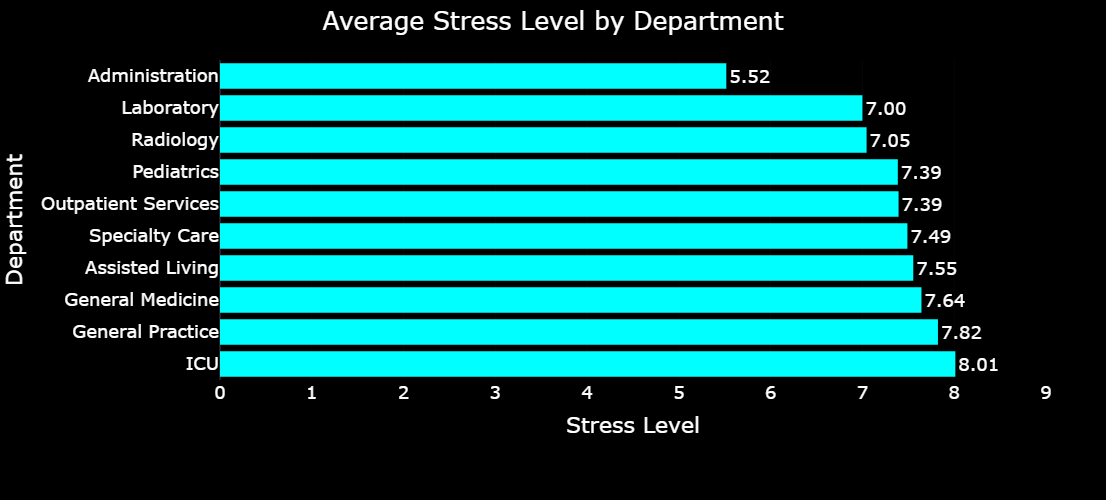

In [152]:
# 2) Group by Department and calculate the average Stress Level
avg_stress_by_dept = (
    mental_health_df
    .groupby('Department', as_index=False)['Stress Level']
    .mean()
)

# 3) Sort the departments by Stress Level, descending
avg_stress_by_dept = avg_stress_by_dept.sort_values(by='Stress Level', ascending=False)

# 4) Create the horizontal bar chart with data labels
fig = px.bar(
    avg_stress_by_dept,
    x='Stress Level',
    y='Department',
    orientation='h',
    title='Average Stress Level by Department',
    labels={'Stress Level': 'Stress Level', 'Department': 'Department'},
    color_discrete_sequence=['#00ffff'],
    text='Stress Level'
)

# 5) Format text and axes so labels don’t overlap
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside',
    cliponaxis=False
)
fig.update_xaxes(automargin=True)

# 6) Unified layout & styling
fig.update_layout(
    template='presentation',
    xaxis_title='Stress Level',
    yaxis_title='Department',
    xaxis_range=[0, 9],
    width=1000,
    height=500,
    margin=dict(l=220, r=60, t=60, b=120),
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    font=dict(color='white'),
    legend_title=dict(text='Income Level')
)

# 7) Render & export
fig.show()
os.makedirs(results_dir, exist_ok=True)
fig.write_image(os.path.join(results_dir, 'Average_stress_level_by_Department.jpg'))
fig.write_image(os.path.join(results_dir, 'Average_stress_level_by_Department.png'))
fig.write_html(os.path.join(results_dir, 'Average_stress_level_by_Department.html'))

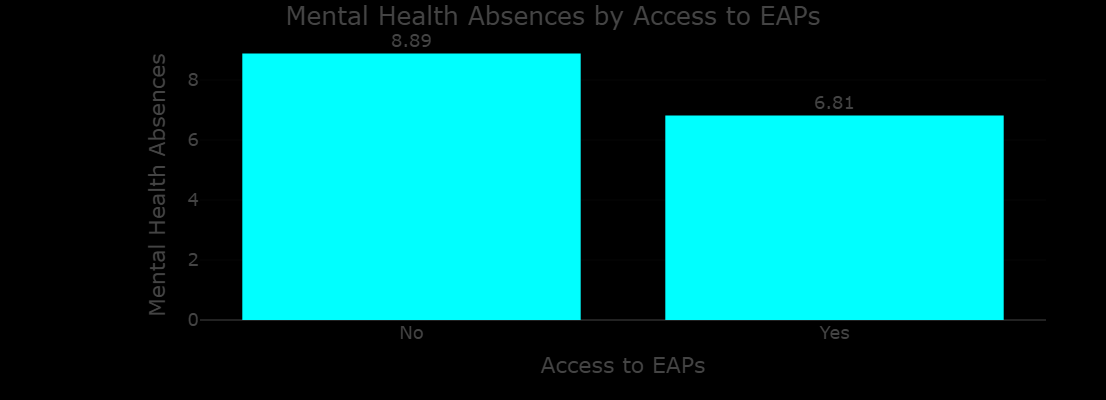

In [151]:
import plotly.express as px
import pandas as pd
import os

# Load the dataset
file_path = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")
mental_health_df = pd.read_csv(file_path)

# Group by access to EAPs and calculate average mental health absence
avg_absence_by_eap = mental_health_df.groupby('Access to EAPs')['Mental Health Absences'].mean().reset_index()

# Plot bar chart
fig = px.bar(
    avg_absence_by_eap,
    x='Access to EAPs',
    y='Mental Health Absences',
    title='Mental Health Absences by Access to EAPs',
    labels={'Access to EAPs': 'Access to EAPs', 'Mental Health Absences': 'Mental Health Absences'},
    color_discrete_sequence=['#00ffff'],
    text='Mental Health Absences'
)

# Format labels and layout
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside', 
    cliponaxis=False
)
fig.update_layout(
    template='presentation',                       
    legend_title=dict(text='Income Level'),       
    xaxis_title='Access to EAPs',                  
    yaxis_title='Mental Health Absences',          
    yaxis_range=[0, 9],                           
    width=600,                                    
    height=400,                                     
    margin=dict(
        l=200,                                      
        r=60,                                     
        t=50,                                     
        b=80                                  
    ),                                            
    paper_bgcolor='rgb(0, 0, 0)',                  
    plot_bgcolor='rgb(0, 0, 0)'                 
)

fig.show()
fig.write_image(os.path.join(results_dir, 'Mental Health Absences_by_Access to EAPs.jpg'))
fig.write_image(os.path.join(results_dir, 'Mental Health Absences_by_Access to EAPs.png'))
fig.write_html(os.path.join(results_dir, 'Mental Health Absences_by_Access to EAPs.html'))

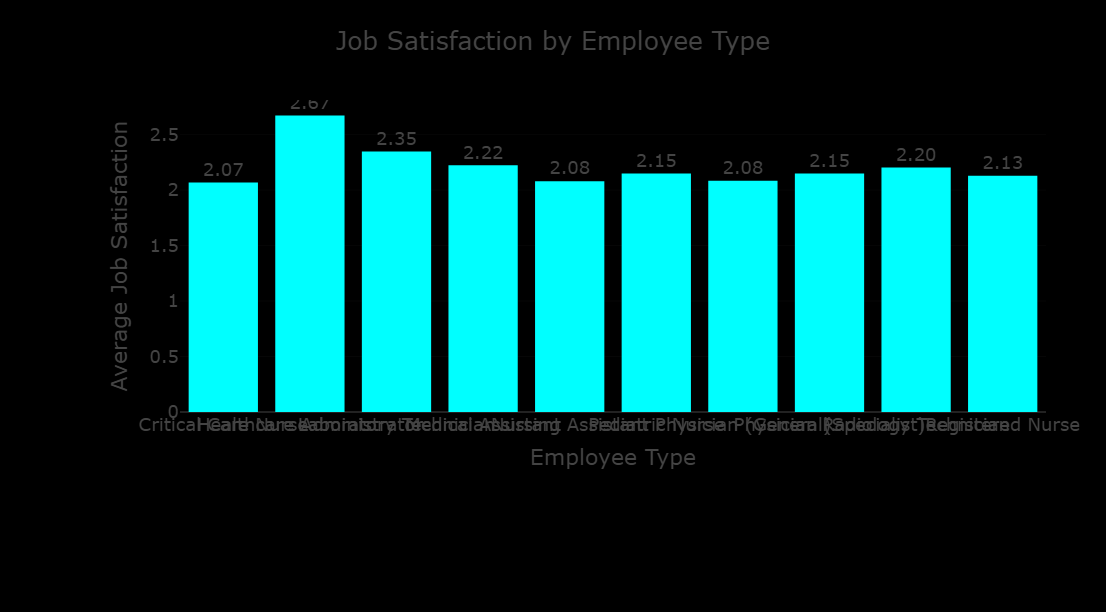

In [163]:

# Define the path to the dataset
file_path = os.path.join(processed_dir, "Healthcare Workforce Mental Health Dataset.csv")

# Read the dataset
mental_health_df = pd.read_csv(file_path)

# Group by 'Employee Type' and calculate average 'Job Satisfaction'
avg_satisfaction_by_type = mental_health_df.groupby('Employee Type')['Job Satisfaction'].mean().reset_index()

# Create the bar chart
fig = px.bar(
    avg_satisfaction_by_type,
    x='Employee Type',
    y='Job Satisfaction',
    title='Job Satisfaction by Employee Type',
    labels={
        'Job Satisfaction': 'Average Job Satisfaction',
        'Employee Type': 'Employee Type'
    },
    color_discrete_sequence=['#00ffff'],
    text='Job Satisfaction'
)

# Improve layout and appearance
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.update_layout(
    template='presentation',
    legend_title=dict(text='Income Level'),
    xaxis_title='Employee Type',
    yaxis_title='Average Job Satisfaction',
    xaxis_tickangle=0,
    
    width=2400,
    height=600,
    margin=dict(l=180, r=60, t=100, b=200),
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)'
)

fig.show()

# Write outputs
os.makedirs(results_dir, exist_ok=True)
fig.write_image(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.png'))
fig.write_html(os.path.join(results_dir, 'Jobsatisfaction_by_employee Type.html'))